In [3]:
import pandas as pd
import numpy as np

In [4]:
df_Preprossed = pd.read_csv('/home/fac/krishnandu/Disaster_Automated_Form_Filling-main/temp/EdgeIoT/ML-EdgeIIoT-dataset.csv')

/tmp/ipykernel_1073376/1328872617.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Preprossed = pd.read_csv('/home/fac/krishnandu/Disaster_Automated_Form_Filling-main/temp/EdgeIoT/ML-EdgeIIoT-dataset.csv')


In [5]:
df_Preprossed.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [4]:
df_Preprossed.shape

(157800, 63)

In [5]:
df_Preprossed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

In [8]:
df_Preprossed["Attack_label"].value_counts()

Attack_label
1    133499
0     24301
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset (replace with actual file path)
df = df_Preprossed

# Convert 'frame.time' to datetime
df['frame.time'] = pd.to_datetime(df['frame.time'], errors='coerce')

def basic_info(df):
    print("\n--- Dataset Info ---")
    print(df.info())
    print("\n--- Missing Values ---")
    print(df.isnull().sum())
    print("\n--- Dataset Shape ---")
    print(df.shape)


def feature_analysis(df):
    num_features = df.select_dtypes(include=['float64', 'int64']).columns
    
    print("\n=== Summary Statistics ===")
    summary_stats = df[num_features].describe()
    # Add skewness and kurtosis to summary
    summary_stats.loc['skewness'] = df[num_features].skew()
    summary_stats.loc['kurtosis'] = df[num_features].kurtosis()
    print(summary_stats)
    
    # Plot individual distributions
    for feature in num_features:
        # Create figure with larger size
        plt.figure(figsize=(12, 8))
        
        # Create subplot grid
        gs = plt.GridSpec(2, 2, height_ratios=[2, 1])
        
        # Histogram with KDE
        ax0 = plt.subplot(gs[0, :])
        sns.histplot(data=df, x=feature, kde=True, ax=ax0)
        ax0.set_title(f'Distribution of {feature}', pad=20, fontsize=14)
        ax0.set_xlabel(feature, fontsize=12)
        ax0.set_ylabel('Count', fontsize=12)
        
        # Add mean and median lines
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        ax0.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        ax0.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        ax0.legend()
        
        # Box plot
        ax1 = plt.subplot(gs[1, 0])
        sns.boxplot(data=df, x=feature, ax=ax1)
        ax1.set_title('Box Plot', fontsize=12)
        
        # Q-Q plot
        ax2 = plt.subplot(gs[1, 1])
        stats.probplot(df[feature].dropna(), dist="norm", plot=ax2)
        ax2.set_title('Q-Q Plot', fontsize=12)
        
        # Add feature statistics as text
        stats_text = (
            f"Statistics:\n"
            f"Mean: {df[feature].mean():.2f}\n"
            f"Median: {df[feature].median():.2f}\n"
            f"Std Dev: {df[feature].std():.2f}\n"
            f"Skewness: {df[feature].skew():.2f}\n"
            f"Kurtosis: {df[feature].kurtosis():.2f}\n"
            f"Missing Values: {df[feature].isnull().sum()}"
        )
        plt.figtext(1.02, 0.5, stats_text, fontsize=10, va='center')
        
        # Adjust layout and display
        plt.tight_layout()
        plt.show()
        
        # Print feature-specific insights
        print(f"\n=== Insights for {feature} ===")
        print(f"- Range: {df[feature].min():.2f} to {df[feature].max():.2f}")
        if abs(df[feature].skew()) > 1:
            print(f"- Distribution is {'positively' if df[feature].skew() > 0 else 'negatively'} skewed")
        if df[feature].nunique() / len(df) < 0.01:
            print("- Feature has low cardinality (few unique values)")
        if df[feature].isnull().sum() > 0:
            print(f"- Contains {df[feature].isnull().sum()} missing values ({(df[feature].isnull().sum()/len(df))*100:.1f}%)")
        
        # Add correlation analysis if there are multiple numerical features
        if len(num_features) > 1:
            correlations = df[num_features].corr()[feature].sort_values(ascending=False)
            print("\nTop correlations:")
            print(correlations[correlations.index != feature].head())
        
        print("\n" + "="*50 + "\n")


def attack_distribution(df):
    if "Attack_label" in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=df["Attack_label"], palette="coolwarm")
        plt.title("Attack Label Distribution")
        plt.xlabel("Attack Label")
        plt.ylabel("Count")
        plt.show()
        print(df["Attack_label"].value_counts())
    else:
        print("No 'Attack_label' column found.")
    
    if "Attack_type" in df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=df["Attack_type"], order=df["Attack_type"].value_counts().index, palette="viridis")
        plt.title("Attack Type Distribution")
        plt.xlabel("Count")
        plt.ylabel("Attack Type")
        plt.show()
        print(df["Attack_type"].value_counts())




/tmp/ipykernel_1073376/2793518653.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['frame.time'] = pd.to_datetime(df['frame.time'], errors='coerce')


In [12]:
basic_info(df)



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   frame.time                 142095 non-null  datetime64[ns]
 1   ip.src_host                157800 non-null  object        
 2   ip.dst_host                157800 non-null  object        
 3   arp.dst.proto_ipv4         157800 non-null  object        
 4   arp.opcode                 157800 non-null  float64       
 5   arp.hw.size                157800 non-null  float64       
 6   arp.src.proto_ipv4         157800 non-null  object        
 7   icmp.checksum              157800 non-null  float64       
 8   icmp.seq_le                157800 non-null  float64       
 9   icmp.transmit_timestamp    157800 non-null  float64       
 10  icmp.unused                157800 non-null  float64       
 11  http.file_data             157


=== Summary Statistics ===


             arp.opcode    arp.hw.size  icmp.checksum    icmp.seq_le  \
count     157800.000000  157800.000000  157800.000000  157800.000000   
mean           0.014195       0.059848    3047.291838    3239.979778   
std            0.149783       0.596245   11144.328203   11406.072994   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       0.000000       0.000000       0.000000   
75%            0.000000       0.000000       0.000000       0.000000   
max            2.000000       6.000000   65532.000000   65524.000000   
skewness      11.475214       9.862355       3.916007       3.741245   
kurtosis     138.199504      95.267261      14.725320      13.296843   

          icmp.transmit_timestamp  icmp.unused  http.content_length  \
count                1.578000e+05     157800.0        157800.000000   
mean                 4.046816e+04          0.0            14.7155

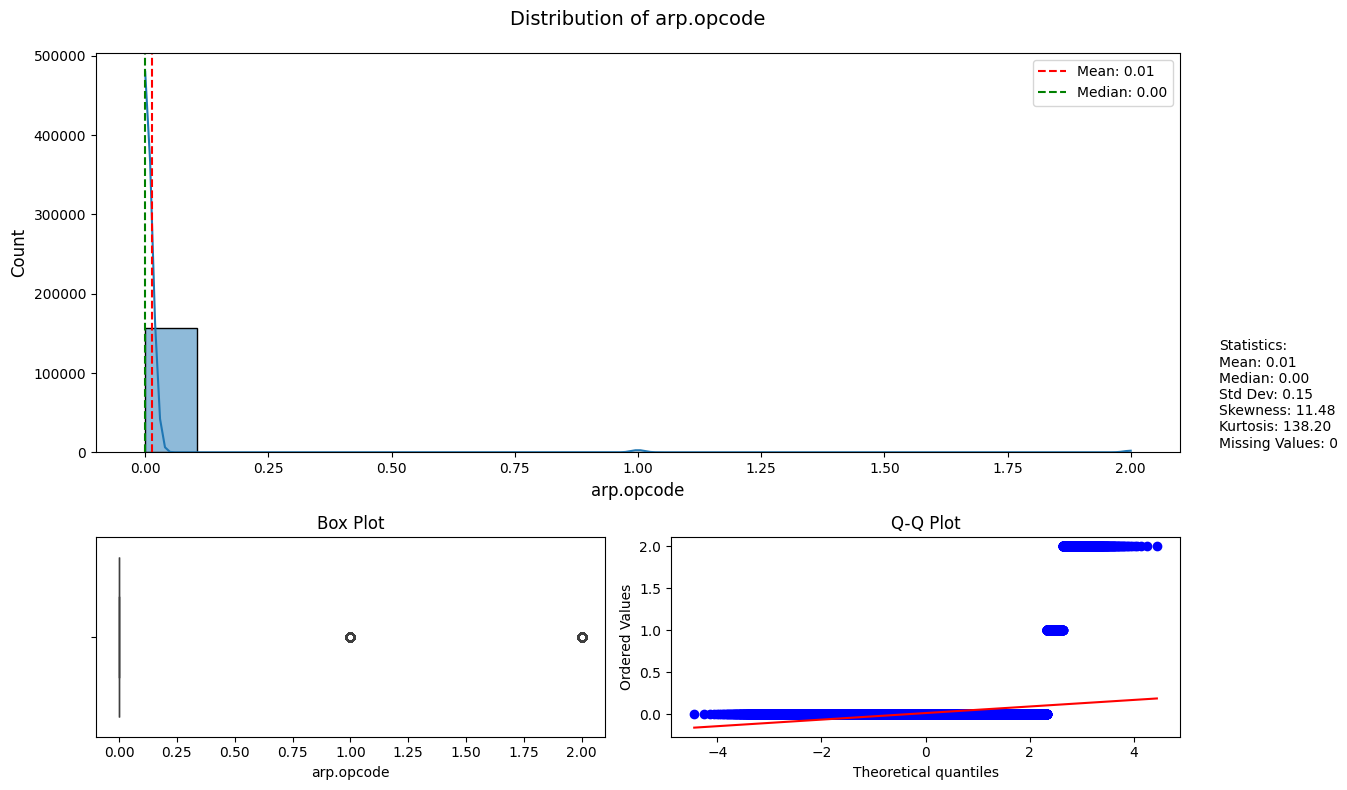


=== Insights for arp.opcode ===
- Range: 0.00 to 2.00
- Distribution is positively skewed
- Feature has low cardinality (few unique values)

Top correlations:
arp.hw.size               0.944180
Attack_label              0.035043
dns.retransmit_request   -0.000239
dns.retransmission       -0.000727
udp.port                 -0.001197
Name: arp.opcode, dtype: float64




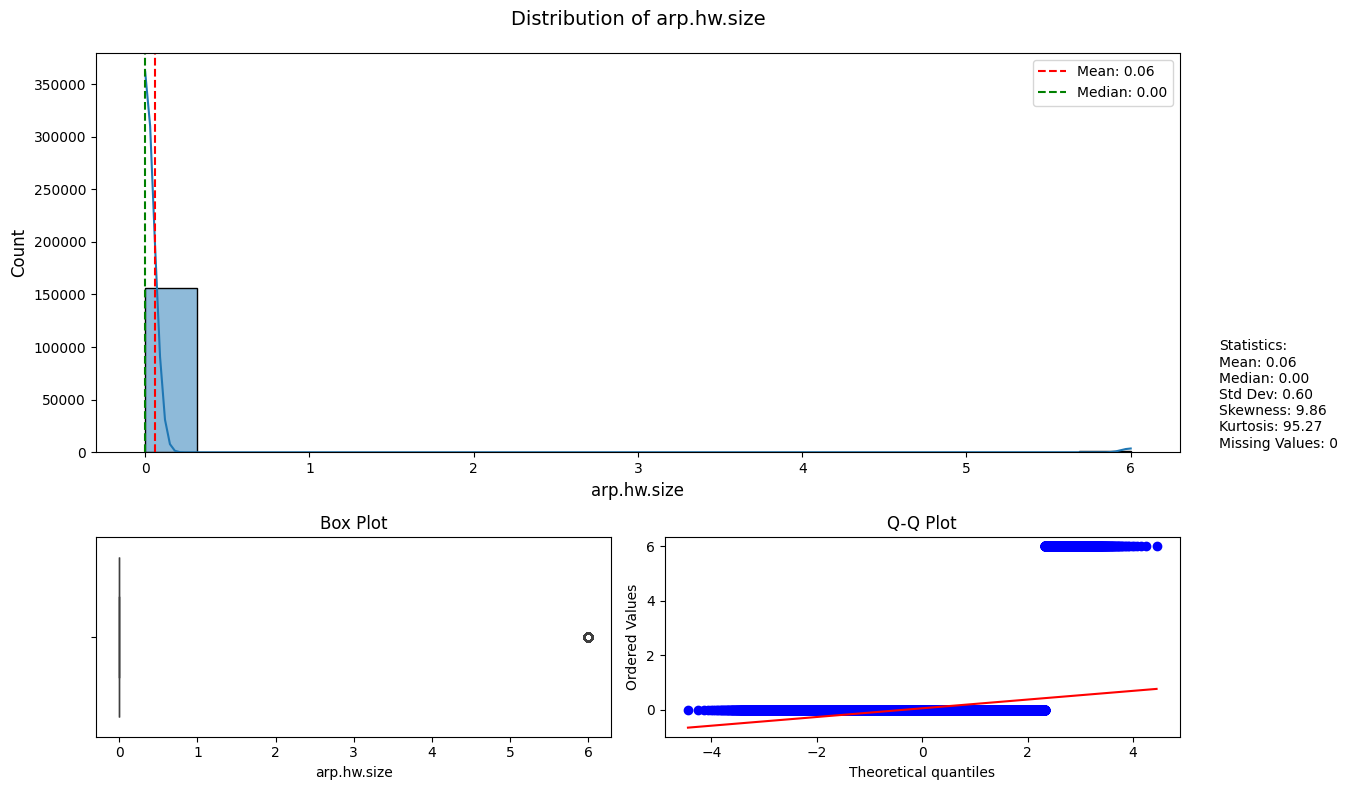


=== Insights for arp.hw.size ===
- Range: 0.00 to 6.00
- Distribution is positively skewed
- Feature has low cardinality (few unique values)

Top correlations:
arp.opcode                0.944180
Attack_label              0.035405
dns.retransmit_request   -0.000253
dns.retransmission       -0.000770
udp.port                 -0.001268
Name: arp.hw.size, dtype: float64




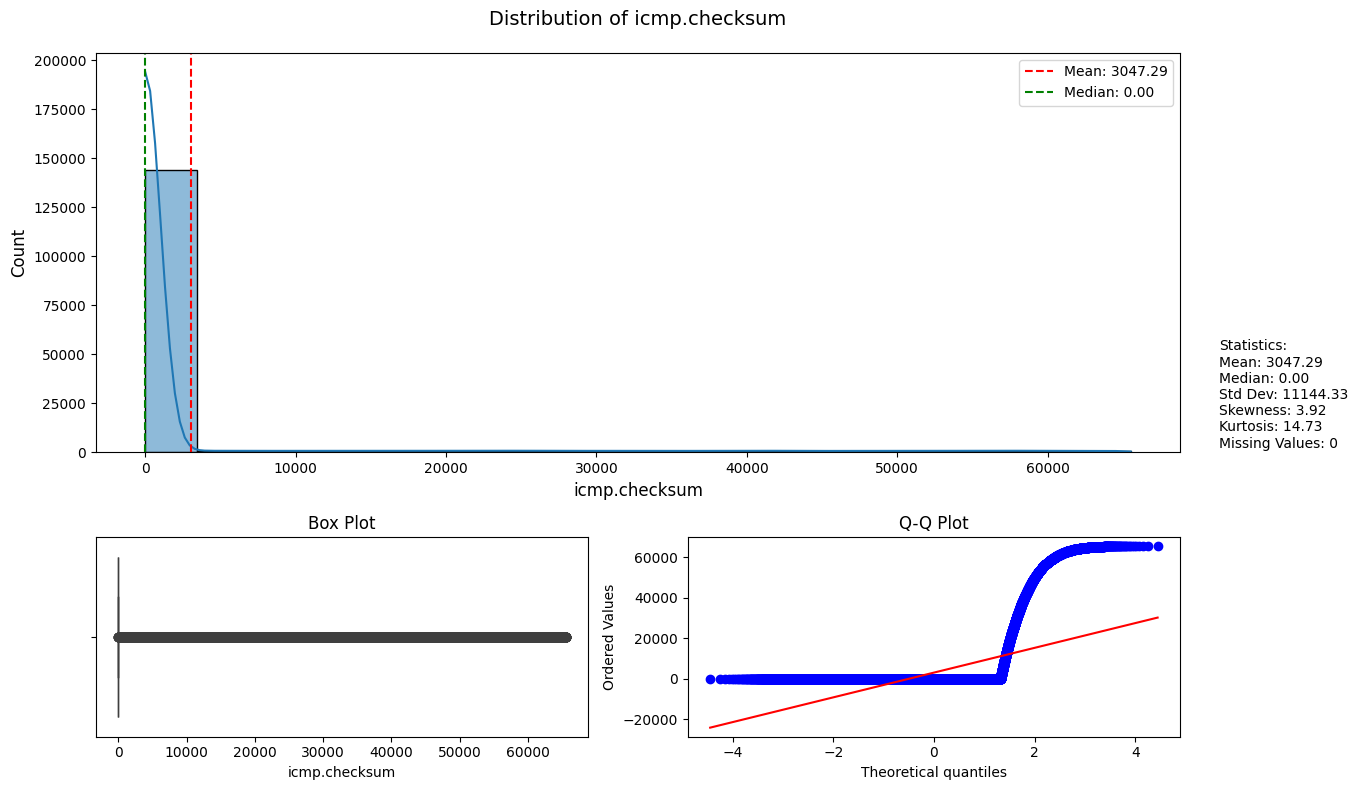


=== Insights for icmp.checksum ===
- Range: 0.00 to 65532.00
- Distribution is positively skewed

Top correlations:
icmp.seq_le                0.681919
Attack_label               0.116663
icmp.transmit_timestamp    0.056344
dns.retransmit_request    -0.000688
dns.retransmission        -0.002097
Name: icmp.checksum, dtype: float64




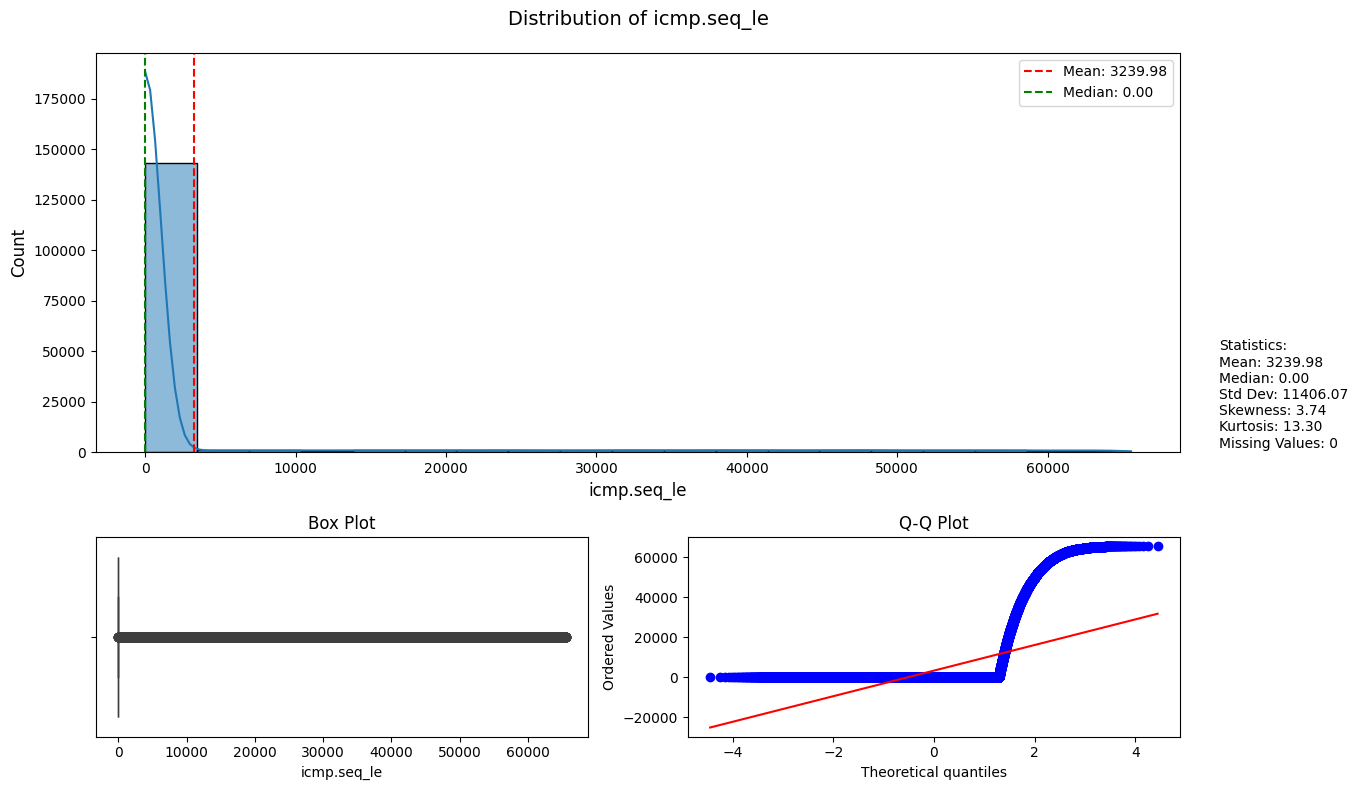


=== Insights for icmp.seq_le ===
- Range: 0.00 to 65524.00
- Distribution is positively skewed

Top correlations:
icmp.checksum             0.681919
dns.qry.name              0.211808
Attack_label              0.121194
dns.retransmit_request   -0.000715
dns.retransmission       -0.002178
Name: icmp.seq_le, dtype: float64




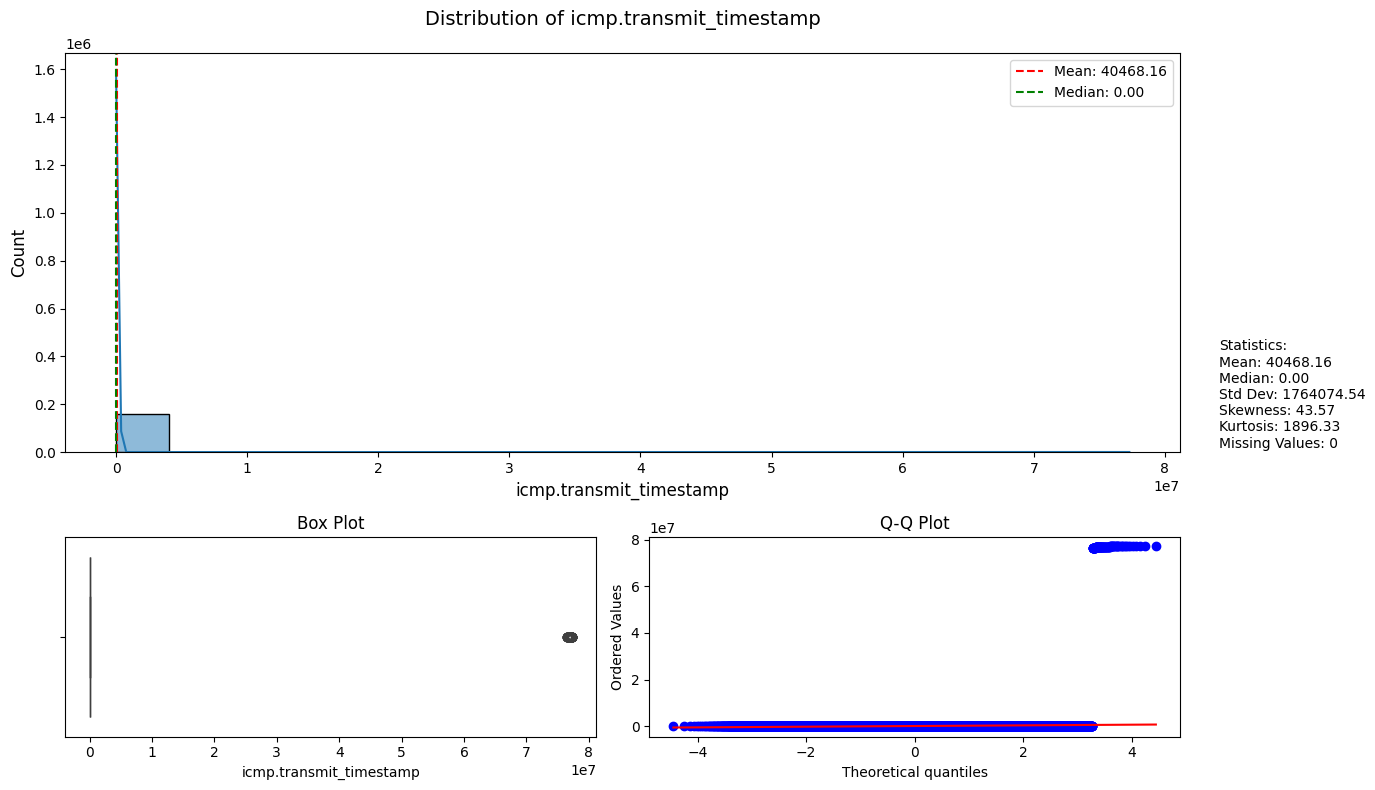


=== Insights for icmp.transmit_timestamp ===
- Range: 0.00 to 77289023.00
- Distribution is positively skewed
- Feature has low cardinality (few unique values)

Top correlations:
icmp.checksum             0.056344
Attack_label              0.009787
dns.retransmit_request   -0.000058
dns.retransmission       -0.000176
udp.port                 -0.000290
Name: icmp.transmit_timestamp, dtype: float64




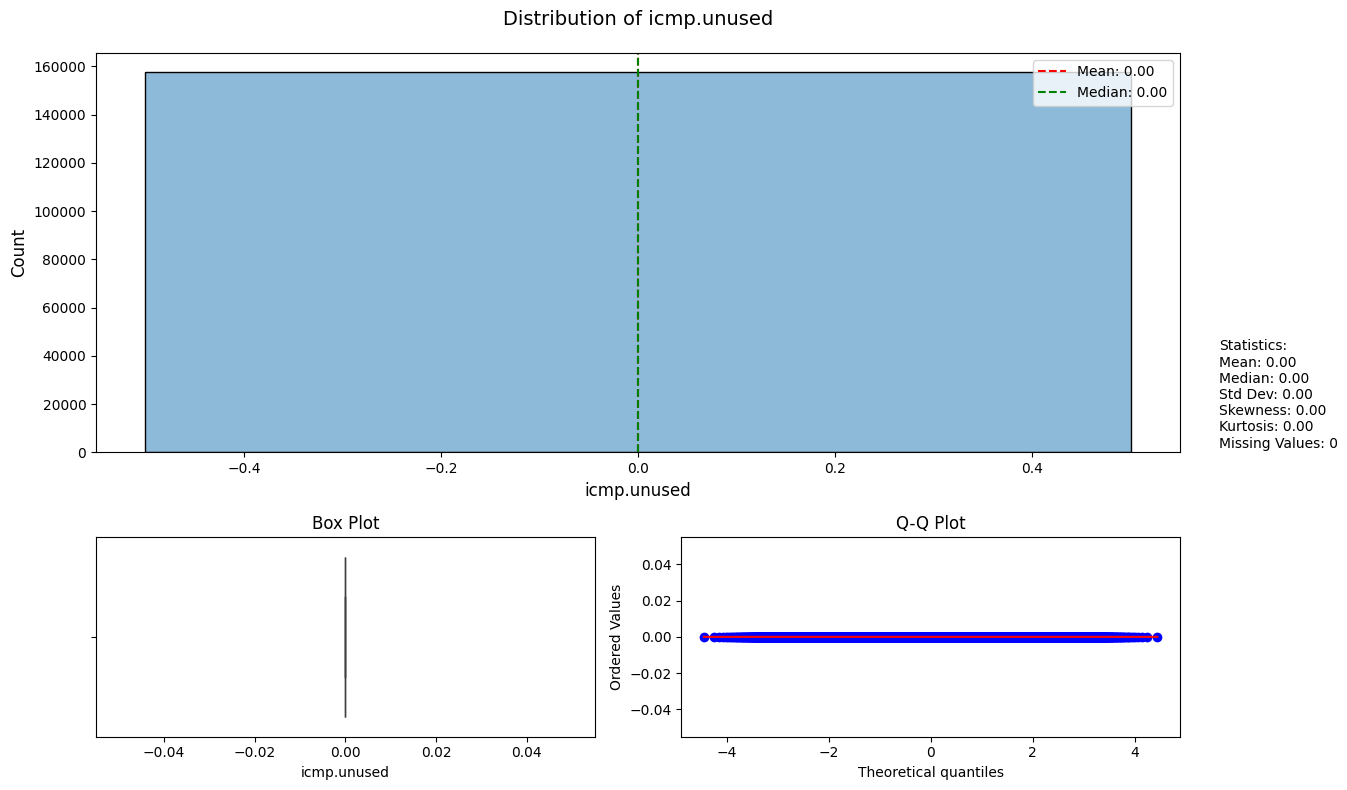


=== Insights for icmp.unused ===
- Range: 0.00 to 0.00
- Feature has low cardinality (few unique values)

Top correlations:
arp.opcode                NaN
arp.hw.size               NaN
icmp.checksum             NaN
icmp.seq_le               NaN
icmp.transmit_timestamp   NaN
Name: icmp.unused, dtype: float64




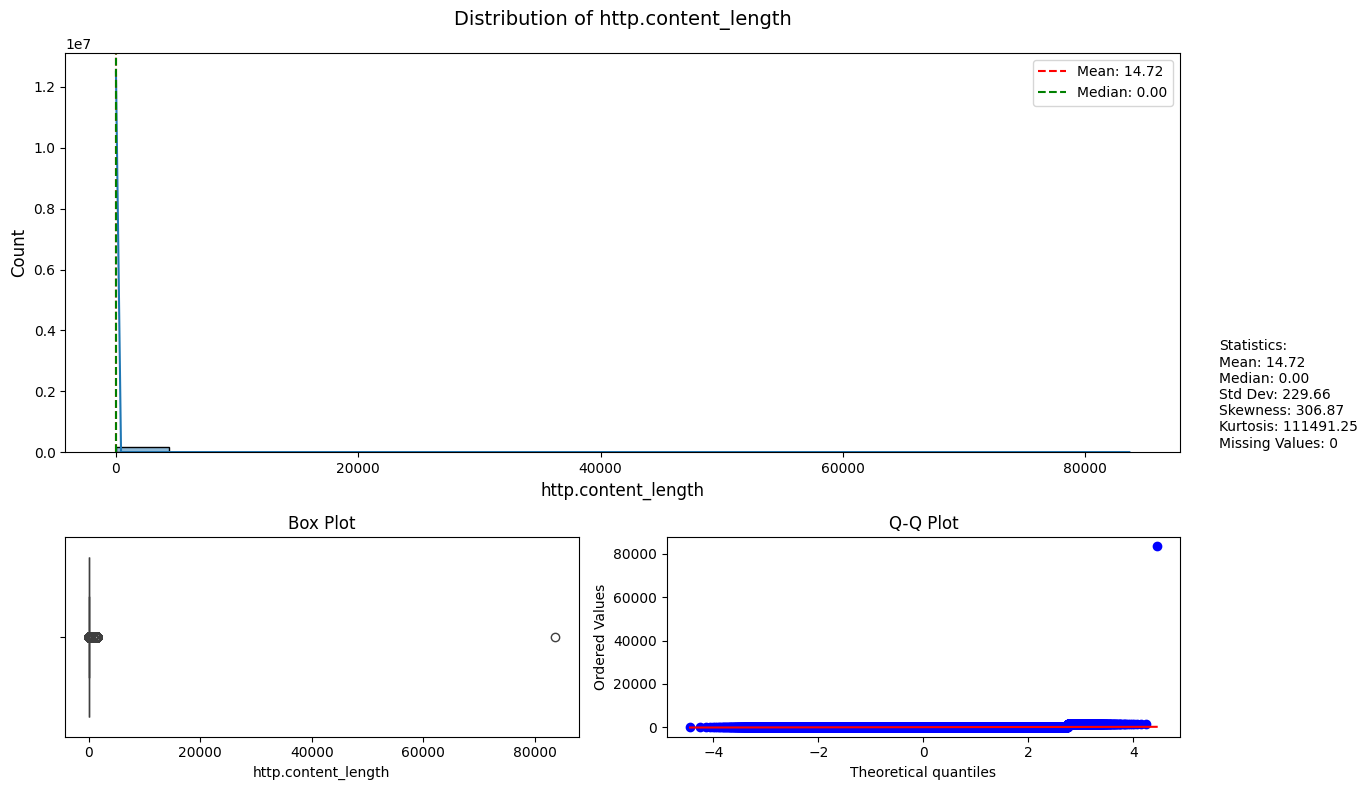


=== Insights for http.content_length ===
- Range: 0.00 to 83655.00
- Distribution is positively skewed
- Feature has low cardinality (few unique values)

Top correlations:
http.response    0.267495
tcp.flags        0.078287
tcp.dstport      0.072431
tcp.flags.ack    0.048553
tcp.ack_raw      0.040141
Name: http.content_length, dtype: float64




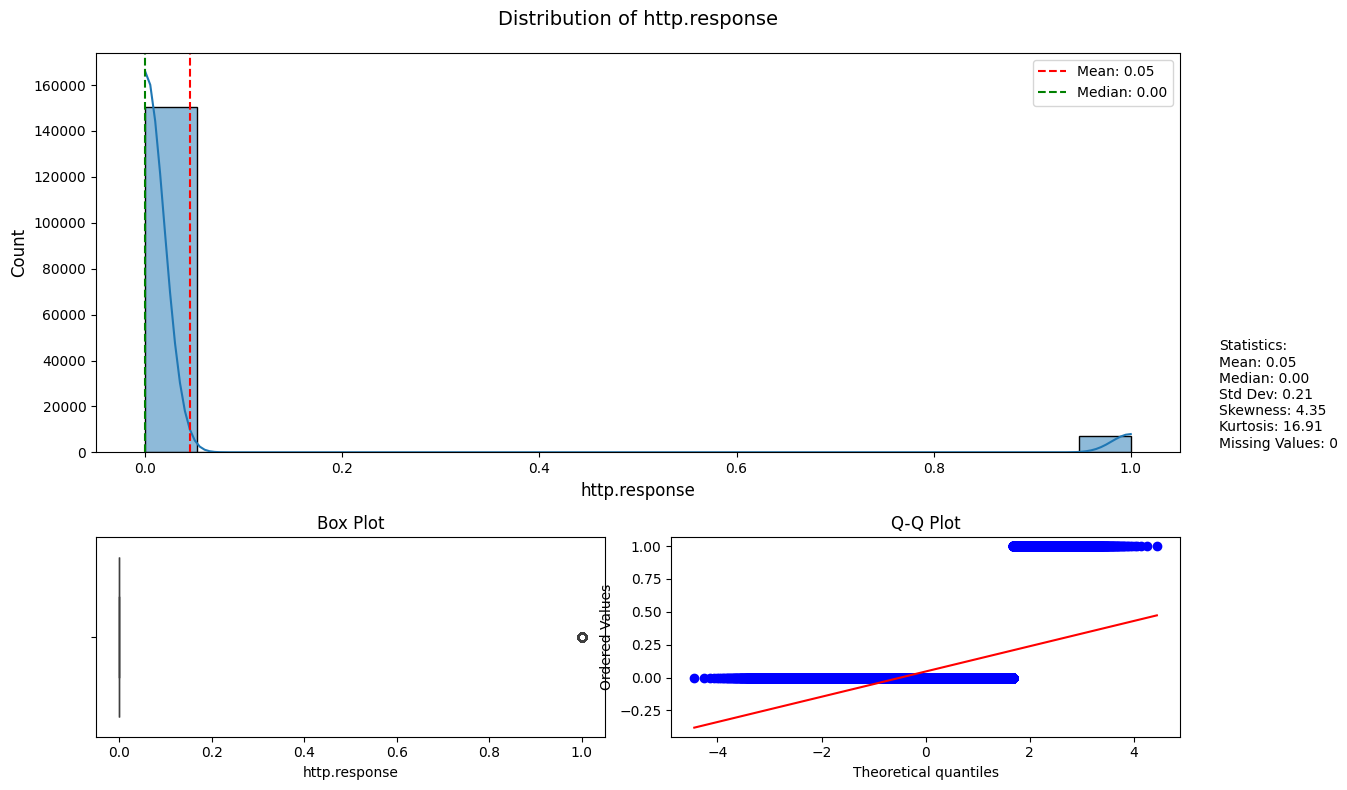


=== Insights for http.response ===
- Range: 0.00 to 1.00
- Distribution is positively skewed
- Feature has low cardinality (few unique values)

Top correlations:
tcp.dstport            0.279144
http.content_length    0.267495
tcp.flags              0.267357
tcp.flags.ack          0.165913
tcp.ack_raw            0.142450
Name: http.response, dtype: float64




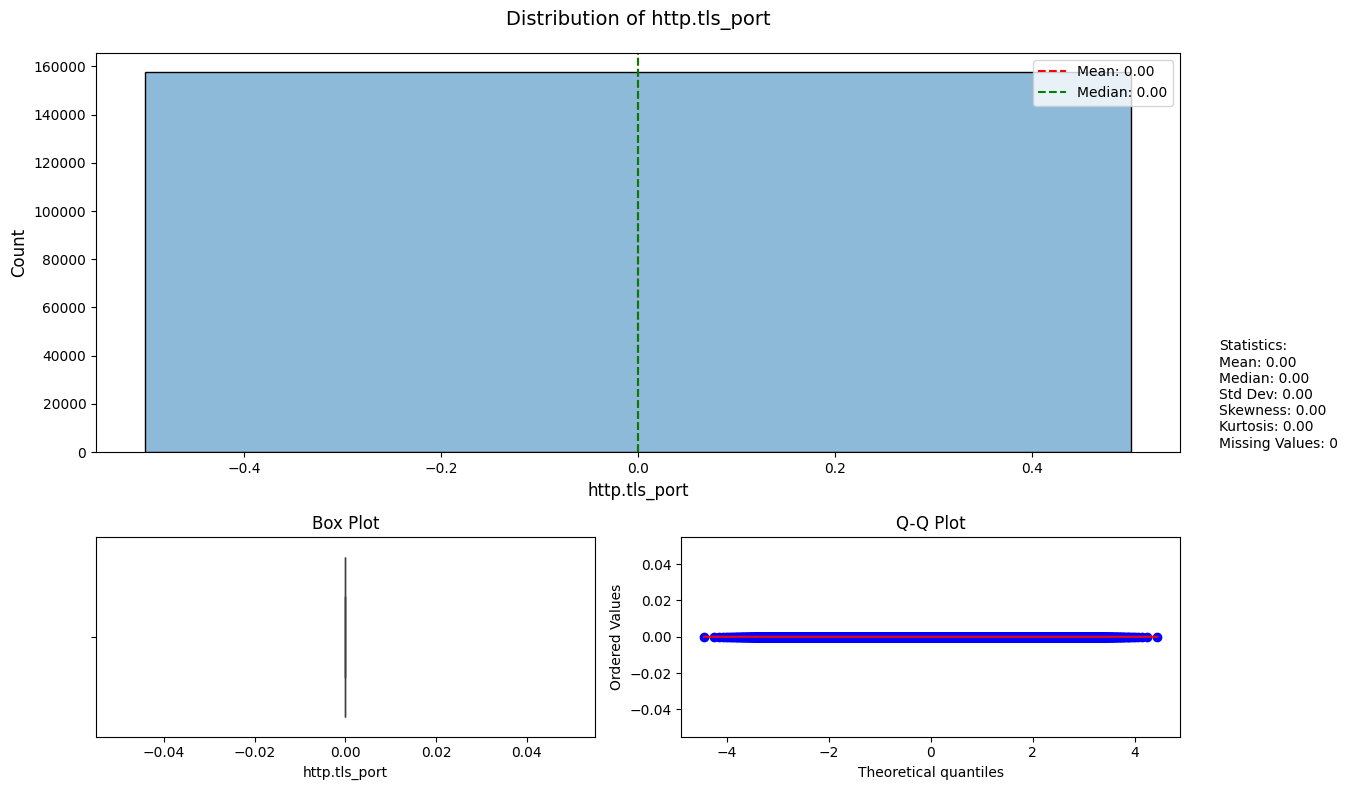


=== Insights for http.tls_port ===
- Range: 0.00 to 0.00
- Feature has low cardinality (few unique values)

Top correlations:
arp.opcode                NaN
arp.hw.size               NaN
icmp.checksum             NaN
icmp.seq_le               NaN
icmp.transmit_timestamp   NaN
Name: http.tls_port, dtype: float64




In [ ]:
feature_analysis(df)

/tmp/ipykernel_1073376/2793518653.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Attack_label"], palette="coolwarm")


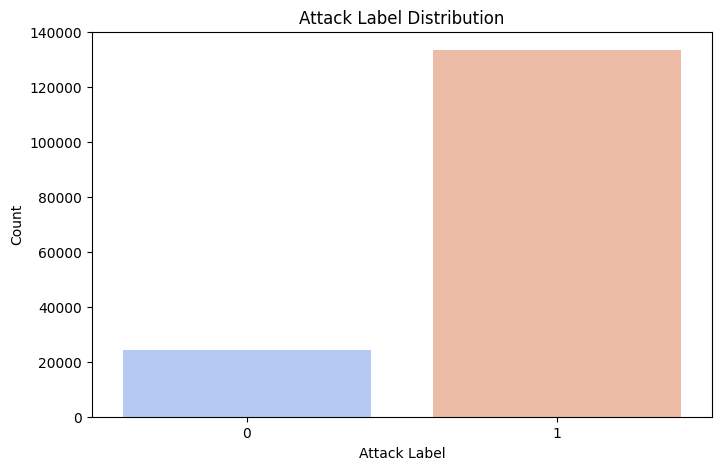

Attack_label
1    133499
0     24301
Name: count, dtype: int64


/tmp/ipykernel_1073376/2793518653.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Attack_type"], order=df["Attack_type"].value_counts().index, palette="viridis")


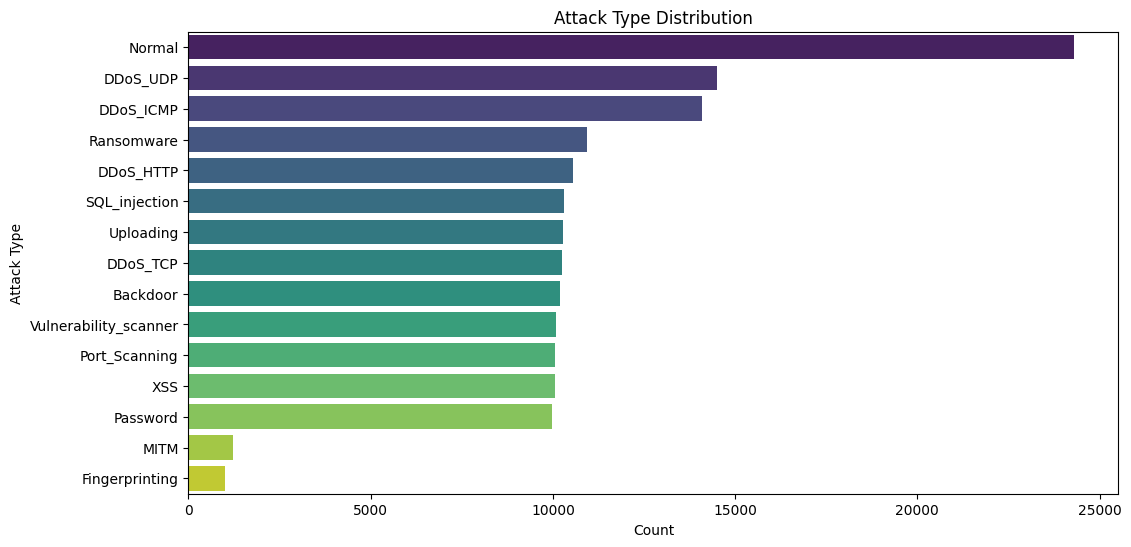

Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: count, dtype: int64


In [8]:
attack_distribution(df)

In [11]:
for _ in range(11):
    df = df.sample(frac=1).reset_index(drop=True)

In [13]:
# Define the maximum number of samples per attack type
max_samples = 5000

# Create an empty list to store sampled data
extracted_data = []

# Iterate over each attack type and sample data accordingly
for attack_type, group in df.groupby("Attack_type"):
    sampled_group = group.sample(n=min(max_samples, len(group)), random_state=42)
    extracted_data.append(sampled_group)

# Concatenate all sampled data
extracted_df = pd.concat(extracted_data)

# Save the extracted dataset
extracted_df.to_csv("Extracted_EdgeIoT_Dataset.csv", index=False)

print("Dataset extraction complete! Saved as 'Extracted_EdgeIoT_Dataset.csv'")


Dataset extraction complete! Saved as 'Extracted_EdgeIoT_Dataset.csv'
